In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare

file = 'Meta_COGRES_NC_females_p-valueonly.txt'
file2 = 'Meta_COGRES_females_p-valueonly.txt'

df = pd.read_csv(file, delim_whitespace=True)
df2 = pd.read_csv(file2, delim_whitespace=True)

df.head()
df2.head()

,SNP,EffectAllele,AlternateAllele,P,VariantInfo
0,chr10:100024328:A:C,C,A,0.506807,chr10:100024328:C:A
1,chr10:100055357:C:T,T,C,0.284872,chr10:100055357:T:C
2,chr10:100138841:T:C,C,T,0.056618,chr10:100138841:C:T
3,chr10:100210277:C:T,T,C,0.473574,chr10:100210277:T:C
4,chr10:100297215:G:T,T,G,0.093537,chr10:100297215:T:G


In [24]:
# Remove rows of data with insignificant p values (p > 0.05)
significant_df = df[df['P'] < 0.05]
significant_df2 = df2[df2['P'] < 0.05]

print(significant_df)

                         SNP EffectAllele AlternateAllele         P  \
5        chr10:100301463:C:A            A               C  0.022850   
12       chr10:100990864:C:T            T               C  0.040588   
17        chr10:10186721:G:A            A               G  0.025708   
46       chr10:104230889:C:A            A               C  0.045999   
54       chr10:105214365:A:G            G               A  0.009601   
...                      ...          ...             ...       ...   
7039379            rs9999910            A               G  0.019512   
7039394            rs9999944            A               C  0.016619   
7039406            rs9999963            C               T  0.048001   
7039412            rs9999978            C               T  0.044151   
7039417            rs9999987            T               C  0.028660   

                 VariantInfo  
5        chr10:100301463:A:C  
12       chr10:100990864:T:C  
17        chr10:10186721:A:G  
46       chr10:10423088

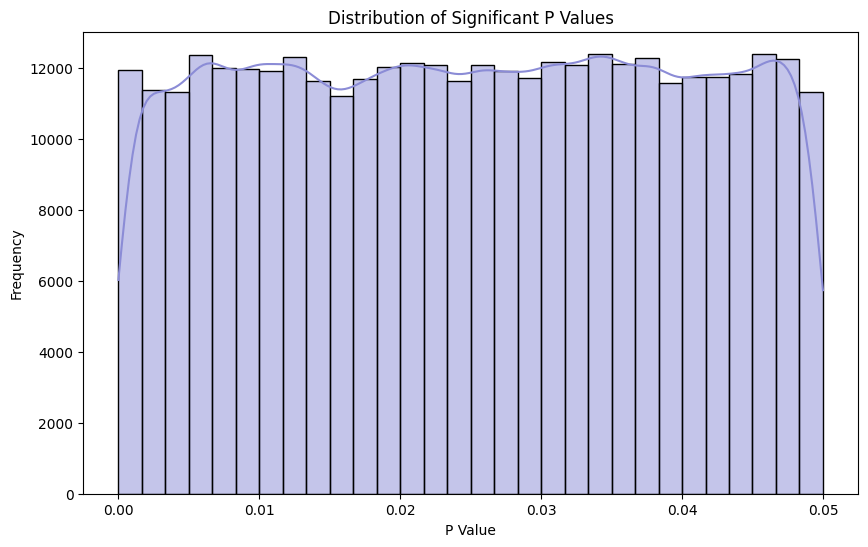

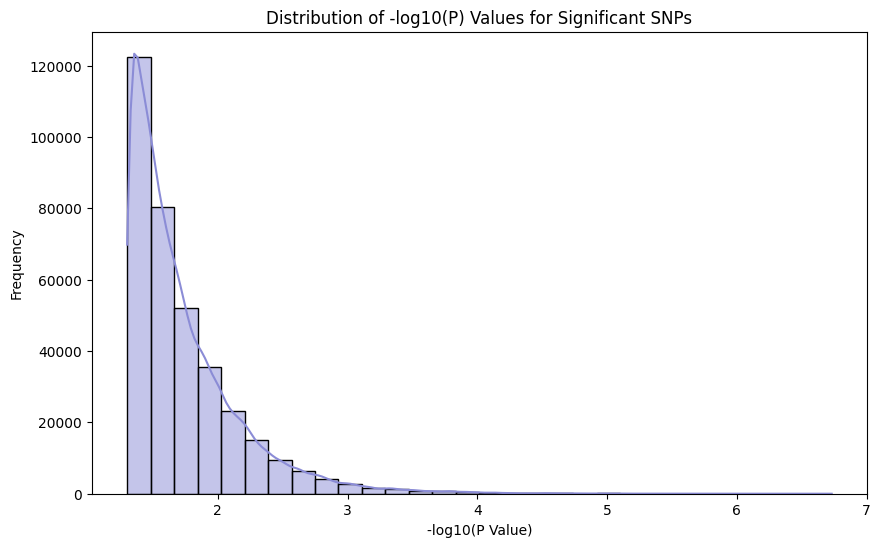

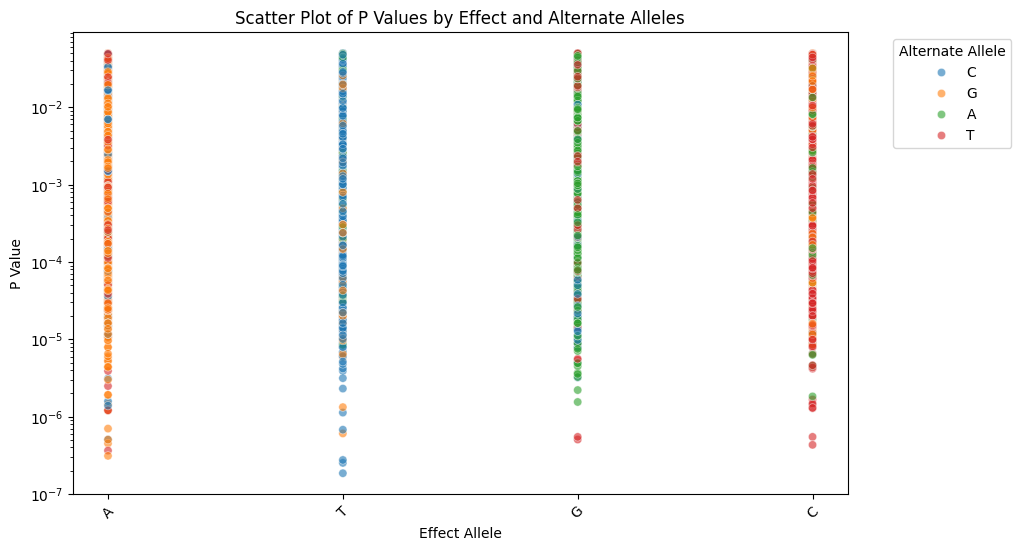

In [22]:
# Plot the distribution of significant P values
plt.figure(figsize=(10,6))
sns.histplot(significant_df['P'], bins=30, kde=True, color='#8B8CD6')
plt.title('Distribution of Significant P Values')
plt.xlabel('P Value')
plt.ylabel('Frequency')
plt.show()

# Plot -log10(P) distribution
plt.figure(figsize=(10, 6))
sns.histplot(-np.log10(significant_df['P']), bins=30, kde=True, color='#8B8CD6')
plt.title('Distribution of -log10(P) Values for Significant SNPs')
plt.xlabel('-log10(P Value)')
plt.ylabel('Frequency')
plt.show()

# Plot joint distribution of effect allele and alternate allele
plt.figure(figsize=(10, 6))
sns.scatterplot(data=significant_df, x='EffectAllele', y='P', hue='AlternateAllele', alpha=0.6)
plt.title('Scatter Plot of P Values by Effect and Alternate Alleles')
plt.xlabel('Effect Allele')
plt.ylabel('P Value')
plt.yscale('log')  # log scale for better visibility
plt.xticks(rotation=45)
plt.legend(title='Alternate Allele', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



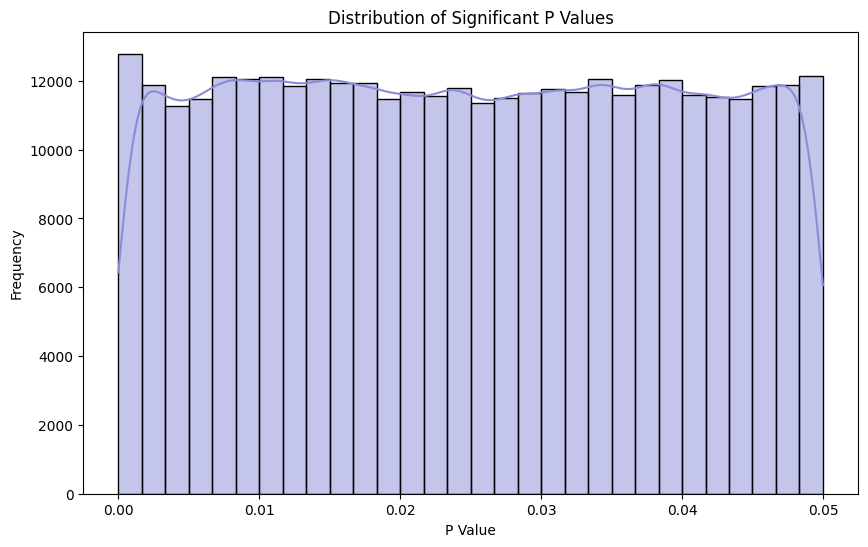

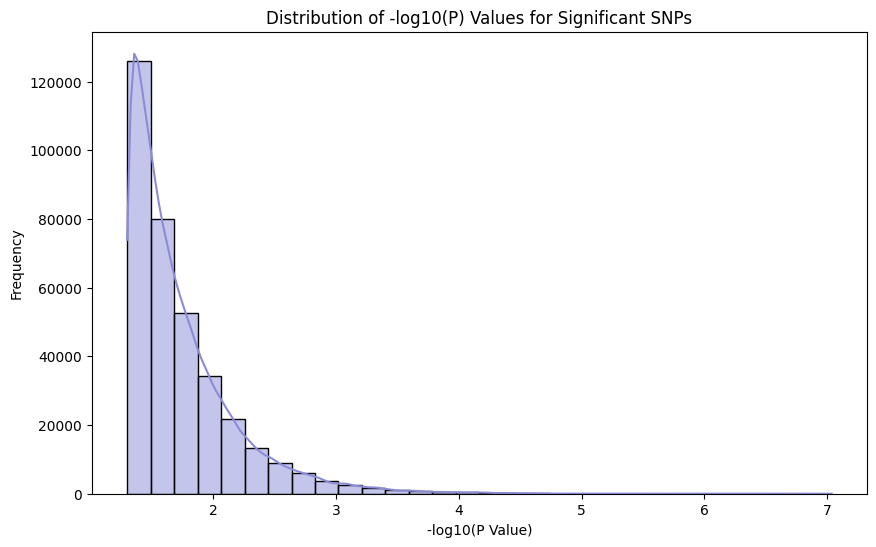

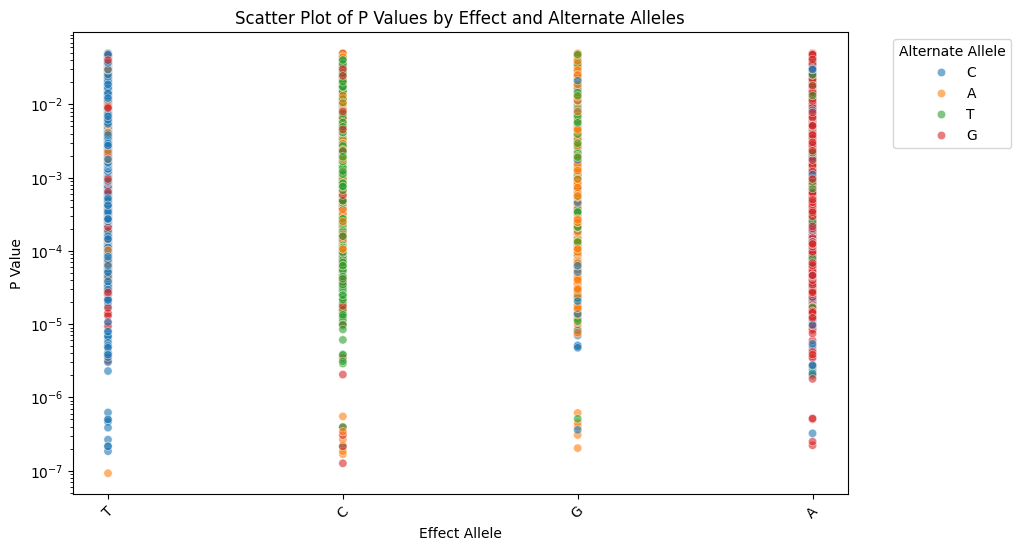

In [25]:
# Plot the distribution of significant P values
plt.figure(figsize=(10,6))
sns.histplot(significant_df2['P'], bins=30, kde=True, color='#8B8CD6')
plt.title('Distribution of Significant P Values')
plt.xlabel('P Value')
plt.ylabel('Frequency')
plt.show()

# Plot -log10(P) distribution
plt.figure(figsize=(10, 6))
sns.histplot(-np.log10(significant_df2['P']), bins=30, kde=True, color='#8B8CD6')
plt.title('Distribution of -log10(P) Values for Significant SNPs')
plt.xlabel('-log10(P Value)')
plt.ylabel('Frequency')
plt.show()

# Plot joint distribution of effect allele and alternate allele
plt.figure(figsize=(10, 6))
sns.scatterplot(data=significant_df2, x='EffectAllele', y='P', hue='AlternateAllele', alpha=0.6)
plt.title('Scatter Plot of P Values by Effect and Alternate Alleles')
plt.xlabel('Effect Allele')
plt.ylabel('P Value')
plt.yscale('log')  # log scale for better visibility
plt.xticks(rotation=45)
plt.legend(title='Alternate Allele', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()